## Load Data and preprocessing

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_excel("db.xlsx")
data

,SURNAME,NAME,DOB,ISOLA,CS,Ciclina(PL/PF/AL/AF/RL/RF),Start date CDK,I Linea 1si;2no,END CDK,Last_FUP,...,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,MUT note,ILM,Sinc
0,ABBATE,CARLA,1975-09-02,SI,NaN,RL,2025-01-21,1,NT,31/03/2025,...,15.0,0.0,0.0,1.0,0.0,0.0,0,NO,NaN,1.0
1,BREGASI,EDLIRA,1969-04-17,SI,NaN,RL,2025-01-15,1,NT,31/03/2025,...,5.0,0.0,1.0,1.0,1.0,0.0,0,NO,124.0,0.0
2,PETREA,DANA DANIELA,1977-08-31,SI,NaN,RL,2024-12-18,1,NT,31/03/2025,...,NaN,0.0,0.0,0.0,1.0,0.0,0,NO,129.0,0.0
3,LORUBBIO,MARIA ROSARIA,1968-08-11,SI,NaN,RL,2024-12-13,1,NT,31/03/2025,...,15.0,0.0,0.0,0.0,0.0,0.0,0,BRCA2,52.0,0.0
4,FLAVONI,RITA,1949-08-25,SI,NaN,PF,2024-12-04,1,NT,31/03/2025,...,25.0,0.0,0.0,0.0,0.0,0.0,0,no,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,ZACCAGNINI,ROSSELLA,1965-04-04,NO,51246676.0,PF,2024-08-27,1,NT,31/03/2025,...,NaN,1.0,0.0,0.0,0.0,1.0,0,ESR1 MUT,119.0,0.0
455,ASCONE,CRISTINA,1971-04-23,NO,10290815.0,AF,2024-09-23,1,2024-12-17 00:00:00,2024-12-17 00:00:00,...,35.0,0.0,1.0,1.0,1.0,0.0,0,BRCA2 VP,35.0,0.0
456,COSTETTI,FRANCESCA,1967-03-08,NO,14579973.0,AF,2024-09-24,1,NT,31/03/2025,...,26.0,1.0,0.0,0.0,1.0,0.0,1,no,85.0,0.0
457,DI SALVO,ANTONELLA,1968-01-07,NO,37702602.0,AF,2024-10-09,1,NT,31/03/2025,...,25.0,1.0,0.0,0.0,1.0,0.0,0,no,69.0,0.0


In [108]:
#Keep only specific columns
data = data[['PD', 'PFS', 'ISOLA', 'Age', 'Menopausal', 'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'ER', 'PgR', 'HER2', 'Ki67', 'Histotype', 'M_Brain', 'M_Liver', 'M_Bone', 'M_Peritoneal', 'Bone_Only', 'Sinc']]
data

,PD,PFS,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc
0,0,2.3,SI,49.421918,0.0,0,0,90.0,90.0,2.0,15.0,0.0,0.0,1.0,0.0,0.0,0,1.0
1,0,2.5,SI,55.786301,1.0,0,0,65.0,65.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0,0.0
2,0,3.4,SI,47.331507,0.0,0,0,65.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0,0.0
3,0,3.6,SI,56.378082,1.0,0,1,90.0,18.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,3.8,SI,75.328767,1.0,0,1,95.0,80.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0,7.1,NO,59.438356,1.0,0,1,90.0,95.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0,0.0
455,1,2.8,NO,53.457534,1.0,0,1,80.0,0.0,2.0,35.0,0.0,1.0,1.0,1.0,0.0,0,0.0
456,0,6.2,NO,57.589041,1.0,0,1,95.0,95.0,0.0,26.0,1.0,0.0,0.0,1.0,0.0,1,0.0
457,0,5.7,NO,56.794521,1.0,0,1,90.0,25.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0,0.0


In [109]:
data = data.replace("NA", np.nan)
data = data.replace("no", 0)
data['HER2'] = data['HER2'].apply(lambda x: 0 if x == 0 else 1)

data.shape

(459, 18)

In [ ]:
data.isnull().sum().sum()

92

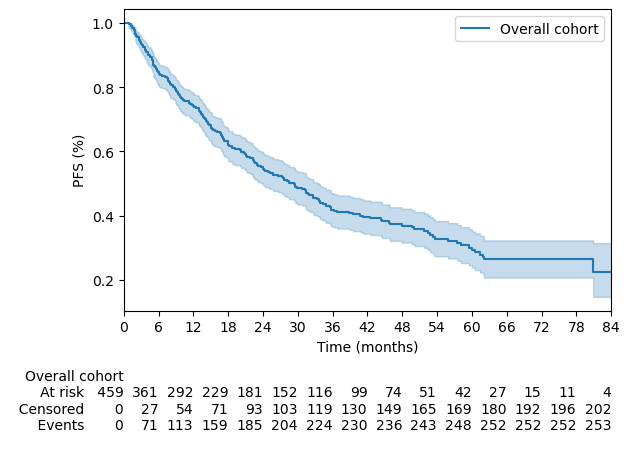

In [131]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt

# Initialize KM fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=data["PFS"], event_observed=data["PD"], label="Overall cohort")

# Plot survival curve
ax = kmf.plot_survival_function(ci_show=True)   # with confidence interval
plt.xlabel("Time (months)")
plt.ylabel("PFS (%)")
plt.title("")

ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)

# Add number at risk table
add_at_risk_counts(kmf, ax=ax)

plt.tight_layout()
plt.savefig("KM_overall.jpeg", format="jpeg", dpi=300)
plt.show()

In [129]:
from lifelines.utils import median_survival_times

# Median survival
median_surv = kmf.median_survival_time_

# 95% CI for median survival
median_ci = median_survival_times(kmf.confidence_interval_)

print(f"Median PFS: {median_surv:.2f} months")
print("95% CI for median survival:")
print(median_ci)

Median PFS: 29.30 months
95% CI for median survival:
     Overall cohort_lower_0.95  Overall cohort_upper_0.95
0.5                       24.0                       33.7


# Model

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, QuantileTransformer, RobustScaler, FunctionTransformer, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from scipy.stats.mstats import winsorize
import numpy as np
import optuna
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
import joblib
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [147]:
import pandas as pd
from sksurv.datasets import get_x_y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# Assuming your DataFrame is called df
# df = your_data

# Define the column names for event and time (PFS and PFS_Months)
attr_labels = ['PD', 'PFS']  # Replace with your actual column names

# Get the features (X) and survival labels (y) using get_x_y
X, y = get_x_y(data, attr_labels, survival=True, pos_label=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1159, stratify=X['ISOLA'])

In [148]:
print(X_train.shape)
print(X_test.shape)

(321, 16)
(138, 16)


In [149]:
from tableone import TableOne

# 7. Tag datasets for comparison
X_train["Set"] = "Training"
X_test["Set"] = "Validation"
df = pd.concat([X_train, X_test], axis=0)
df

,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc,Set
251,NO,59.652055,1.0,0,0,90.0,25.0,1,35.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,Training
54,SI,77.073973,1.0,1,0,95.0,5.0,0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Training
442,NO,73.046575,1.0,0,0,90.0,70.0,0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Training
449,NO,64.578082,1.0,0,0,90.0,80.0,1,25.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,Training
194,NO,62.032877,1.0,0,0,90.0,60.0,1,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,SI,51.934247,1.0,0,0,85.0,70.0,1,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Validation
276,NO,48.758904,0.0,0,0,90.0,75.0,0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Validation
441,NO,60.572603,1.0,0,0,95.0,75.0,1,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Validation
30,SI,74.638356,1.0,0,0,95.0,95.0,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Validation


In [114]:
# Step 1: Create the combined hormone resistance column
def classify_hormone_resistance(row):
    if row['Hormone_Resistance_Primary'] == 1:
        return "Primary Resistant"
    elif row['Hormone_Resistance_Secondary'] == 1:
        return "Secondary Resistant"
    else:
        return "Hormone Sensitive"

df["Hormone_Resistance_Status"] = df.apply(classify_hormone_resistance, axis=1)

# Step 2: Make it an ordered categorical with consistent labels
df["Hormone_Resistance_Status"] = pd.Categorical(
    df["Hormone_Resistance_Status"],
    categories=["Hormone Sensitive", "Primary Resistant", "Secondary Resistant"],
    ordered=True
)

# Step 3: Drop original columns
df = df.drop(columns=['Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary'])


In [116]:
from tableone import TableOne
import numpy as np

# Replace 'None' strings in categorical variables with missing values
df.replace("None", pd.NA, inplace=True)

# Select all columns excluding the 'Set' column
columns = df.columns.drop("Set").tolist()

# Infer categorical variables (those with ≤ 5 unique values, excluding NaNs)
categorical = ['Histotype', 'Menopausal', 'M_Brain', 'M_Liver', 'M_Bone', 'M_Peritoneal', 'Bone_Only', 'Hormone_Resistance_Status', 'Sinc', 'ISOLA', 'HER2']
nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS', 'PD']

# Force median [IQR] for all continuous variables by treating all as non-normal
my_table = TableOne(
    df,
    columns=columns,
    categorical=categorical,
    groupby="Set",
    pval=True,
    nonnormal=nonnormal,
    missing=True  # this shows missing data counts
)

# Print the table
print(my_table)

# Save to xlsx
my_table.to_excel("table1.xlsx", index=True)

                                                     Grouped by Set                                                              
                                                            Missing           Overall          Training        Validation P-Value
n                                                                                 459               321               138        
ISOLA, n (%)                     NO                                        359 (78.2)        251 (78.2)        108 (78.3)   1.000
                                 SI                                        100 (21.8)         70 (21.8)         30 (21.7)        
Age, median [Q1,Q3]                                               0  61.8 [52.0,71.0]  61.8 [52.7,70.6]  61.9 [50.5,71.5]   0.893
Menopausal, n (%)                0.0                                       115 (25.1)         74 (23.1)         41 (29.7)   0.314
                                 1.0                                       341 (74.3)     

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

set_config(display="text")  # displays text representation of estimators

In [117]:
y_df_train = pd.DataFrame({
    'PD': y_train['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_train['PFS']                 # time to event or censoring
})

y_df_test = pd.DataFrame({
    'PD': y_test['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_test['PFS']                 # time to event or censoring
})

## Combine X_train and y_df_train
X_train_combined = pd.concat([X_train.reset_index(drop=True), y_df_train.reset_index(drop=True)], axis=1)
## Combine X_test and y_df_test
X_test_combined = pd.concat([X_test.reset_index(drop=True), y_df_test.reset_index(drop=True)], axis=1)

# Save the DataFrames to Excel files
X_train_combined.to_excel("train.xlsx", index=False)
X_test_combined.to_excel("test.xlsx", index=False)

In [135]:
# Combine the training and test sets keeping the 'Set' column
combined_df = pd.concat([X_train_combined, X_test_combined], ignore_index=True)
combined_df["Set"] = combined_df["Set"].astype(str)  # Ensure 'Set' is a string type
# Save the combined DataFrame to an Excel file
combined_df.to_excel("combined.xlsx", index=False)
combined_df

,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc,Set,PD,PFS
0,NO,59.652055,1.0,0,0,90.0,25.0,1,35.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,Training,1,9.4
1,SI,77.073973,1.0,1,0,95.0,5.0,0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Training,1,4.1
2,NO,73.046575,1.0,0,0,90.0,70.0,0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Training,0,30.0
3,NO,64.578082,1.0,0,0,90.0,80.0,1,25.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,Training,0,4.0
4,NO,62.032877,1.0,0,0,90.0,60.0,1,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Training,0,61.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,SI,51.934247,1.0,0,0,85.0,70.0,1,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Validation,0,11.7
455,NO,48.758904,0.0,0,0,90.0,75.0,0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Validation,0,51.8
456,NO,60.572603,1.0,0,0,95.0,75.0,1,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Validation,0,11.5
457,SI,74.638356,1.0,0,0,95.0,95.0,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Validation,0,48.5


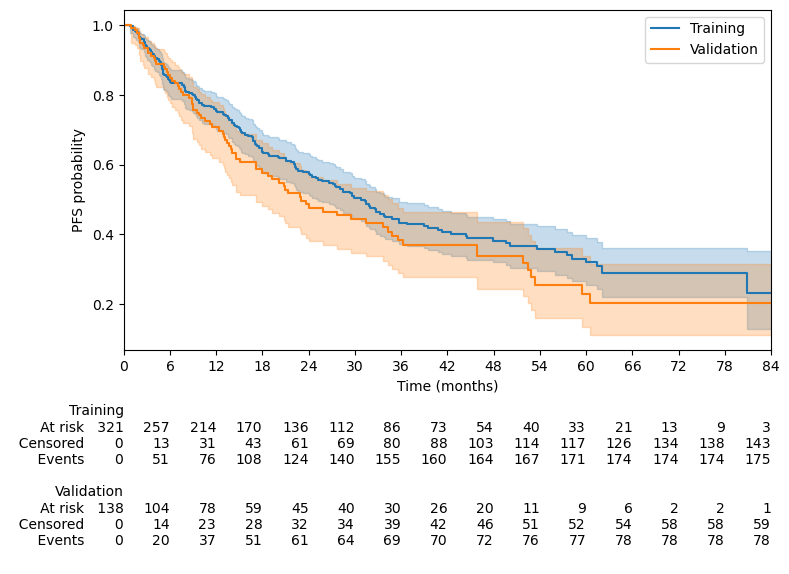

In [140]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(8,6))

# Store the fitted KM objects
kmf_list = []

for name, grouped_df in combined_df.groupby("Set"):
    kmf_i = KaplanMeierFitter()
    kmf_i.fit(durations=grouped_df["PFS"], event_observed=grouped_df["PD"], label=name)
    kmf_i.plot_survival_function(ax=ax, ci_show=True)
    kmf_list.append(kmf_i)

# Labels
plt.xlabel("Time (months)")
plt.ylabel("PFS probability")
plt.title("")

ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)

# Add a single risk table with both groups
add_at_risk_counts(*kmf_list, ax=ax)

plt.tight_layout()
plt.savefig("KM_Set.jpeg", format="jpeg", dpi=300)
plt.show()

In [141]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

results = []

for name, grouped_df in combined_df.groupby("Set"):
    kmf = KaplanMeierFitter()
    kmf.fit(durations=grouped_df["PFS"], event_observed=grouped_df["PD"], label=name)

    # Median survival
    median_surv = kmf.median_survival_time_
    # 95% CI for the median
    median_ci = median_survival_times(kmf.confidence_interval_)
    
    # Number of events
    n_events = grouped_df["PD"].sum()
    n_total = len(grouped_df)

    results.append({
        "Set": name,
        "Median PFS (months)": round(median_surv, 2) if median_surv is not None else "Not reached",
        "95% CI lower": round(median_ci.iloc[0,0], 2) if not median_ci.empty else None,
        "95% CI upper": round(median_ci.iloc[0,1], 2) if not median_ci.empty else None,
        "N events": int(n_events),
        "N total": int(n_total)
    })

summary_df = pd.DataFrame(results)
print(summary_df)


          Set  Median PFS (months)  95% CI lower  95% CI upper  N events  \
0    Training                 30.8          25.2          35.7       175   
1  Validation                 23.0          17.2          34.8        78   

   N total  
0      321  
1      138  


In [142]:
from lifelines.statistics import logrank_test

# Split data
train_df = combined_df[combined_df["Set"] == "Training"]
valid_df = combined_df[combined_df["Set"] == "Validation"]

# Perform log-rank test
results = logrank_test(
    train_df["PFS"], valid_df["PFS"], 
    event_observed_A=train_df["PD"], 
    event_observed_B=valid_df["PD"]
)

print("Log-rank test p-value:", results.p_value)


Log-rank test p-value: 0.17127818437964282


### Coxnet

In [150]:
# Prop the isola column
X_train = X_train.drop(columns=['ISOLA', 'Set'])
X_test = X_test.drop(columns=['ISOLA', 'Set'])

In [151]:
# Create a pipeline with standardization and CoxnetSurvivalAnalysis
coxnet_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)

# Fit the pipeline to estimate alphas
coxnet_pipe.fit(X_train, y_train)

# Retrieve the estimated alphas
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Set up the grid search over the estimated alphas
gcv = GridSearchCV(
    make_pipeline(SimpleImputer(strategy="median"), 
                  StandardScaler(), 
                  CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=-1
)

# Fit the grid search
gcv.fit(X_train, y_train)

# Retrieve cross-validation results
cv_results = pd.DataFrame(gcv.cv_results_)

In [162]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_coxnetsurvivalanalysis__alphas,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000830,0.000927,0.000000,0.000000,[0.2738499070475888],{'coxnetsurvivalanalysis__alphas': [0.27384990...,0.588603,0.500000,0.574704,0.500000,0.590623,0.550786,0.041827,80
1,0.000000,0.000000,0.000000,0.000000,[0.26140300612926265],{'coxnetsurvivalanalysis__alphas': [0.26140300...,0.588603,0.500000,0.574704,0.630798,0.590623,0.576946,0.042776,79
2,0.002400,0.001200,0.001200,0.000748,[0.24952183606745162],{'coxnetsurvivalanalysis__alphas': [0.24952183...,0.588603,0.630727,0.574704,0.630798,0.590623,0.603091,0.023249,73
3,0.003400,0.000490,0.001200,0.000400,[0.23818068352161312],{'coxnetsurvivalanalysis__alphas': [0.23818068...,0.588603,0.630727,0.574704,0.630798,0.590623,0.603091,0.023249,73
4,0.003399,0.000490,0.001780,0.000392,[0.22735500386221655],{'coxnetsurvivalanalysis__alphas': [0.22735500...,0.588603,0.630727,0.574704,0.630798,0.590623,0.603091,0.023249,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000443,0.000631,0.003286,0.002683,[0.008362980472308011],{'coxnetsurvivalanalysis__alphas': [0.00836298...,0.719944,0.749605,0.681213,0.719392,0.691095,0.712250,0.024151,12
76,0.006279,0.000983,0.000802,0.000983,[0.007982870102934669],{'coxnetsurvivalanalysis__alphas': [0.00798287...,0.719944,0.749605,0.681953,0.718631,0.691095,0.712246,0.023920,13
77,0.002184,0.001269,0.001782,0.001548,[0.007620036336488185],{'coxnetsurvivalanalysis__alphas': [0.00762003...,0.719944,0.749605,0.681953,0.716350,0.690307,0.711632,0.023954,22
78,0.003560,0.001101,0.001776,0.000500,[0.007273693924701893],{'coxnetsurvivalanalysis__alphas': [0.00727369...,0.719944,0.748815,0.681953,0.716350,0.690307,0.711474,0.023704,26


In [163]:
gcv.best_params_["coxnetsurvivalanalysis__alphas"][0]

0.016803176364768267

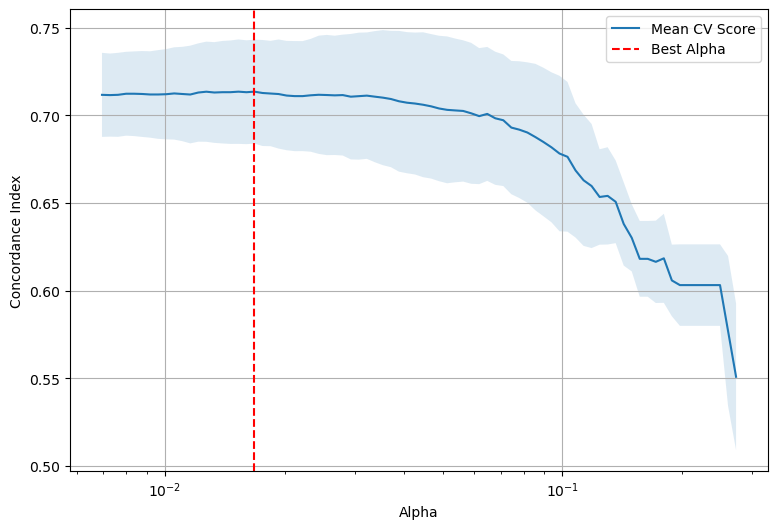

In [164]:
# Extract alpha values and corresponding mean and std of test scores
alphas = cv_results["param_coxnetsurvivalanalysis__alphas"].apply(lambda x: x[0])
mean_scores = cv_results["mean_test_score"]
std_scores = cv_results["std_test_score"]

# Plot the mean test score with standard deviation
plt.figure(figsize=(9, 6))
plt.plot(alphas, mean_scores, label='Mean CV Score')
plt.fill_between(alphas, mean_scores - std_scores, mean_scores + std_scores, alpha=0.15)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Concordance Index")
plt.title("")
plt.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], color="red", linestyle="--", label="Best Alpha")
plt.legend()
plt.grid(True)

plt.savefig("CV.jpeg", format="jpeg", dpi=300)
plt.show()


In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define alphas for the path
alphas = 10.0 ** np.linspace(-2, 0, 100)

# Create pipeline (Imputer + Scaler + Coxnet)
pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=1.0)  # Lasso path
)

# Preprocess features once to avoid re-imputing/scaling in the loop
Xt = pipeline[:-1].fit_transform(X_train)

coefficients = {}

for alpha in alphas:
    model = CoxnetSurvivalAnalysis(l1_ratio=1.0, alphas=[alpha])
    model.fit(Xt, y_train)

    # Flatten coefficients to 1D
    coef_vector = model.coef_.ravel()
    coefficients[round(alpha, 5)] = coef_vector

# Build the DataFrame AFTER collecting coefficients
coefficients = pd.DataFrame.from_dict(coefficients, orient="columns")

# Assign feature names to the index
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(Xt.shape[1])]

coefficients.index = feature_names


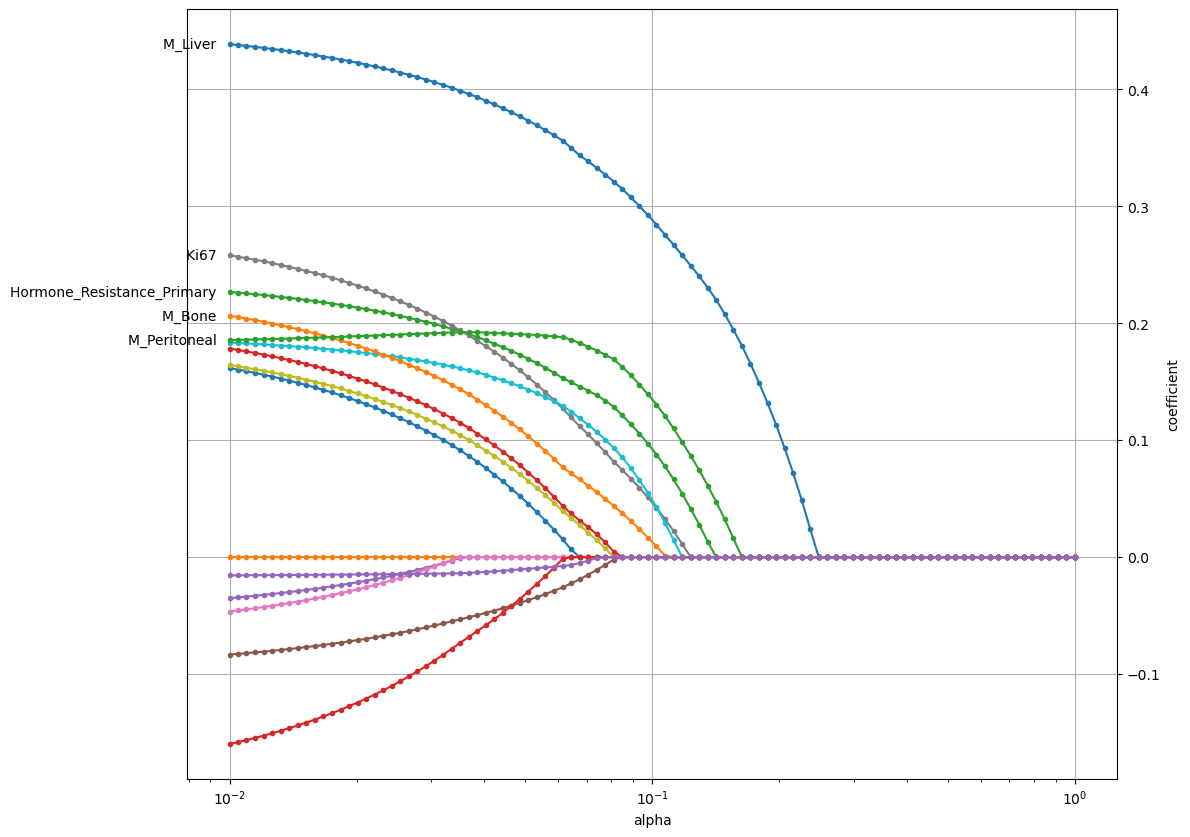

In [177]:
# Plotting Function
def plot_coefficients(coefs, n_highlight=5):
    _, ax = plt.subplots(figsize=(12, 10))
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(alpha_min, coef, name + "   ", horizontalalignment="right", verticalalignment="center")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")
    ax.set_title("")
    plt.savefig("Reg_path.jpeg", format="jpeg", dpi=300)
    plt.show()

# Call the plot function
plot_coefficients(coefficients, n_highlight=5)

In [169]:
# Build final pipeline with best alpha found
final_model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    CoxnetSurvivalAnalysis(
        l1_ratio=0.9,
        alphas=gcv.best_params_["coxnetsurvivalanalysis__alphas"],
        fit_baseline_model=True  # <<< REQUIRED FOR PREDICTING SURVIVAL FUNCTIONS
    )
)

# Fit on full training data
final_model.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alphas=[0.016803176364768267],
                                        fit_baseline_model=True,
                                        l1_ratio=0.9))])

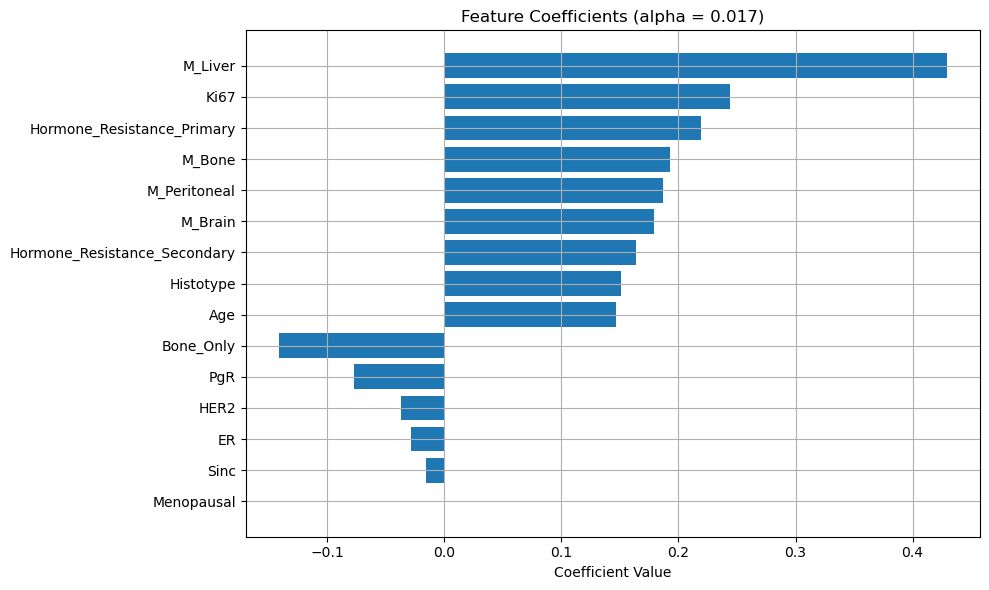

In [178]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the Coxnet model from the pipeline
coxnet_model = final_model.named_steps["coxnetsurvivalanalysis"]

# Retrieve coefficients as a flat array
best_coefs = coxnet_model.coef_.ravel()

# Get feature names
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(best_coefs.shape[0])]

# Create DataFrame for plotting
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": best_coefs
}).sort_values("coefficient", key=lambda x: abs(x), ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df["feature"], coef_df["coefficient"])
plt.xlabel("Coefficient Value")
plt.title(f"Feature Coefficients (alpha = {gcv.best_params_['coxnetsurvivalanalysis__alphas'][0]:.3f})")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()

plt.savefig("Coef_Coxnet.jpeg", format="jpeg", dpi=300)
plt.show()

In [181]:
coef_df

# Save as Excel
coef_df.to_excel("coef_df.xlsx", index=False)

In [179]:
c_index = final_model.score(X_train, y_train)

print(f"Train Concordance Index: {c_index:.2f}")

Train Concordance Index: 0.73


In [175]:
c_index = final_model.score(X_test, y_test)

print(f"Test Concordance Index: {c_index:.2f}")

Test Concordance Index: 0.74


In [176]:
import numpy as np
from sklearn.utils import resample

n_bootstraps = 1000
rng = np.random.default_rng(42)  # for reproducibility

c_indices = []

for i in range(n_bootstraps):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_test, y_test, replace=True, random_state=rng.integers(0, 1e6))
    
    # Compute C-index
    c_index = final_model.score(X_resampled, y_resampled)
    c_indices.append(c_index)

c_indices = np.array(c_indices)

# Point estimate from original test set
c_index_point = final_model.score(X_test, y_test)

# 95% CI from percentiles
ci_lower, ci_upper = np.percentile(c_indices, [2.5, 97.5])

print(f"Test Concordance Index: {c_index_point:.2f} (95% CI: {ci_lower:.2f} – {ci_upper:.2f})")


Test Concordance Index: 0.74 (95% CI: 0.67 – 0.80)


### GBM

In [190]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0)
)

# Set up the grid search over n_estimators
gcv = GridSearchCV(
    estimator=pipeline,
    param_grid={"gradientboostingsurvivalanalysis__n_estimators": np.arange(1, 100, 1)},
    cv=cv,
    error_score=0.5,
    n_jobs=-1
)

# Fit the grid search
gcv.fit(X_train, y_train)

# Retrieve cross-validation results
cv_results = pd.DataFrame(gcv.cv_results_)


In [191]:
# Build final pipeline with best alpha found
final_model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0,
        n_estimators=gcv.best_params_["gradientboostingsurvivalanalysis__n_estimators"]
    )
)

# Fit on full training data
final_model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('gradientboostingsurvivalanalysis',
                 GradientBoostingSurvivalAnalysis(learning_rate=1.0,
                                                  max_depth=1, n_estimators=16,
                                                  random_state=0))])

In [192]:
import joblib
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [193]:
import joblib
final_model = joblib.load('final_model.joblib')

In [194]:
c_index = final_model.score(X_train, y_train)

print(f"Train Concordance Index: {c_index:.5f}")


Train Concordance Index: 0.73916


In [195]:
c_index = final_model.score(X_test, y_test)

print(f"Test Concordance Index: {c_index:.5f}")


Test Concordance Index: 0.74143


In [196]:
import numpy as np

# Number of bootstrap samples
n_bootstrap = 1000
rng = np.random.default_rng(seed=42)
bootstrap_c_indices = []

# Convert test set to indexable format
n_samples = X_test.shape[0]

for _ in range(n_bootstrap):
    # Sample with replacement
    sample_indices = rng.choice(n_samples, n_samples, replace=True)
    
    # Resample data
    X_resampled = X_test.iloc[sample_indices]
    y_resampled = y_test[sample_indices]
    
    # Compute c-index on resampled data
    c_index_resampled = final_model.score(X_resampled, y_resampled)
    bootstrap_c_indices.append(c_index_resampled)

# Convert to array
bootstrap_c_indices = np.array(bootstrap_c_indices)

# Compute 95% CI using percentiles
lower_ci, upper_ci = np.percentile(bootstrap_c_indices, [2.5, 97.5])
mean_ci = np.mean(bootstrap_c_indices)

# Report
print(f"Test Concordance Index: {mean_ci:.4f} (95% CI: {lower_ci:.4f} - {upper_ci:.4f})")

Test Concordance Index: 0.7406 (95% CI: 0.6705 - 0.8039)


In [203]:
coef = pd.Series(final_model.named_steps['gradientboostingsurvivalanalysis'].feature_importances_, X_train.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

# Save non-zero coefficients to Excel
coef_nz_df = pd.DataFrame({
    "feature": coef_nz.index,
    "importance": coef_nz.values
}).sort_values("importance", ascending=False)

coef_nz_df.to_excel("coef_nz.xlsx", index=False)

Number of non-zero coefficients: 10


Number of non-zero coefficients: 10


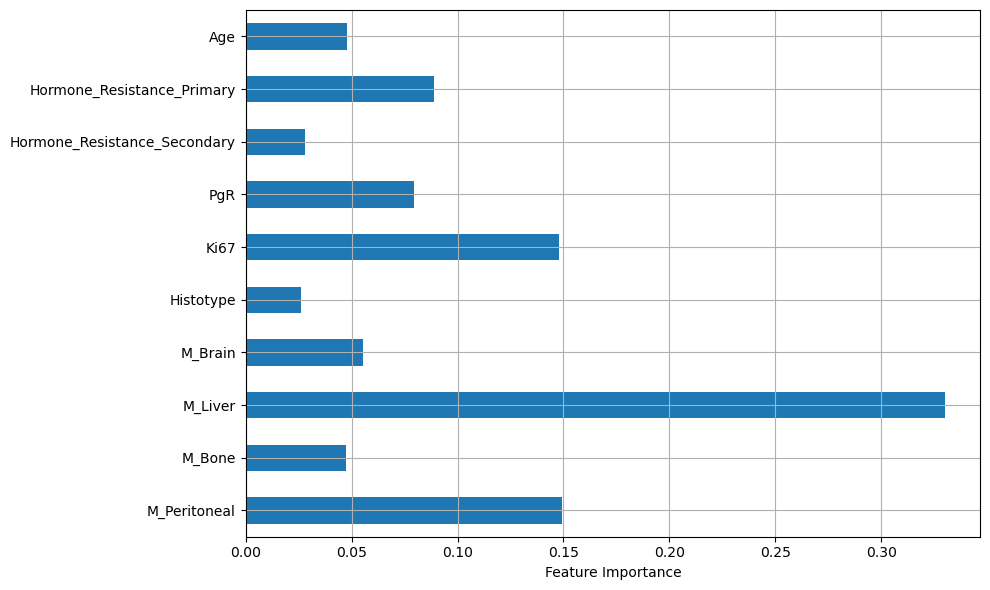

In [202]:
# Report number of non-zero features
print("Number of non-zero coefficients:", coef_nz.shape[0])

# Plot
plt.figure(figsize=(10, 6))
coef_nz.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("")
plt.gca().invert_yaxis()  # Largest at the top
plt.grid(True)
plt.tight_layout()

plt.savefig("Fig1.pdf", format="pdf", dpi=300)
plt.show()

In [207]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Run permutation importance
result = permutation_importance(final_model, X_train, y_train, n_repeats=15, random_state=1159)

# Build dataframe
perm_df = pd.DataFrame(
    {
        "importances_mean": result["importances_mean"],
        "importances_std": result["importances_std"],
    },
    index=X_train.columns  # match with training features
).sort_values(by="importances_mean", ascending=False)

# Save to Excel
perm_df.to_excel("coef_perm.xlsx", index=True)


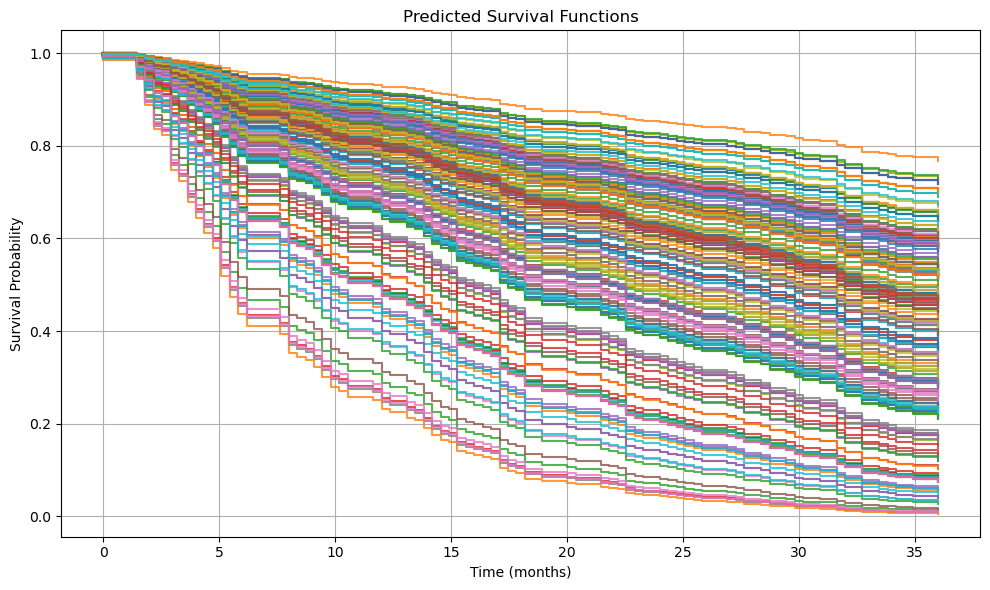

In [208]:
# Fit on full training data
final_model.fit(X_train, y_train)


surv_fns = final_model.predict_survival_function(X_train)

time_points = np.linspace(0, 36, 100)  # More resolution

_, ax = plt.subplots(figsize=(10, 6))
legend_handles = []

# Optional: only show first N patients to avoid clutter
N = 300

for i, fn in enumerate(surv_fns[:N]):
    (line,) = ax.step(time_points, fn(time_points), where="post", alpha=0.8, label=f"Patient {i+1}")
    legend_handles.append(line)

#ax.legend(loc="upper right", title="Patients")
ax.set_title("Predicted Survival Functions")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Survival Probability")
ax.grid(True)
plt.tight_layout()
plt.show()

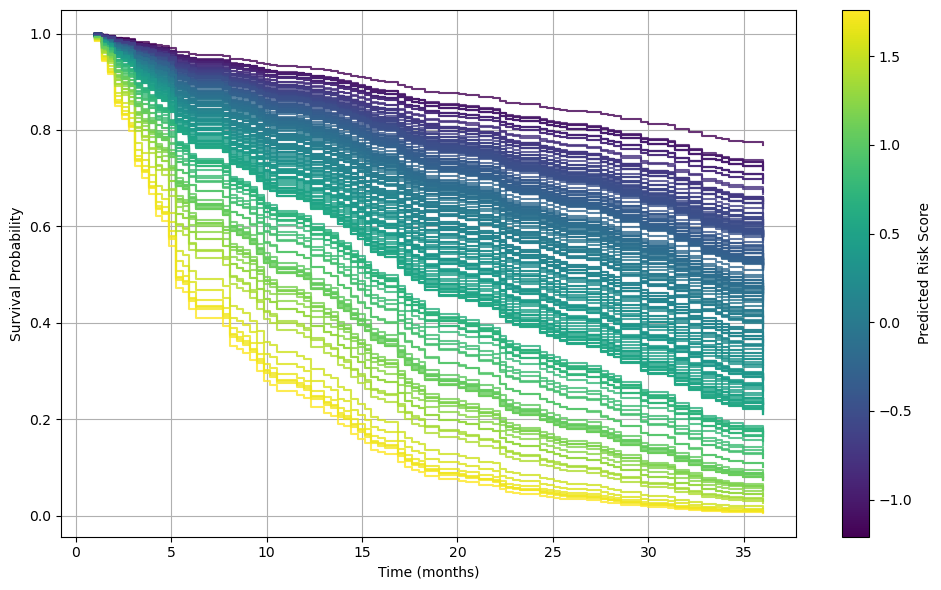

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# Predict survival functions and risk scores
surv_fns = final_model.predict_survival_function(X_train)
risk_scores = final_model.predict(X_train)  # Higher risk = worse survival
risk_scores

# Normalize risk scores for color mapping
norm = colors.Normalize(vmin=min(risk_scores), vmax=max(risk_scores))
cmap = cm.get_cmap("viridis")  # Choose any matplotlib colormap

time_points = np.linspace(1, 36, 100)

fig, ax = plt.subplots(figsize=(10, 6))

# Optional: limit number of curves shown for readability
N = 300

for i, (fn, risk) in enumerate(zip(surv_fns[:N], risk_scores[:N])):
    color = cmap(norm(risk))  # Map risk score to color
    ax.step(time_points, fn(time_points), where="post", color=color, alpha=0.8, label=f"Risk: {risk:.2f}")

# Colorbar to interpret risk scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Risk Score")

ax.set_title("")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Survival Probability")
ax.grid(True)
plt.tight_layout()

plt.savefig("Survival_by_risk.jpeg", format="jpeg", dpi=300)
plt.show()

Cluster means: [-0.34911529  0.63561467]
Suggested cutoff between risk groups: 0.1432


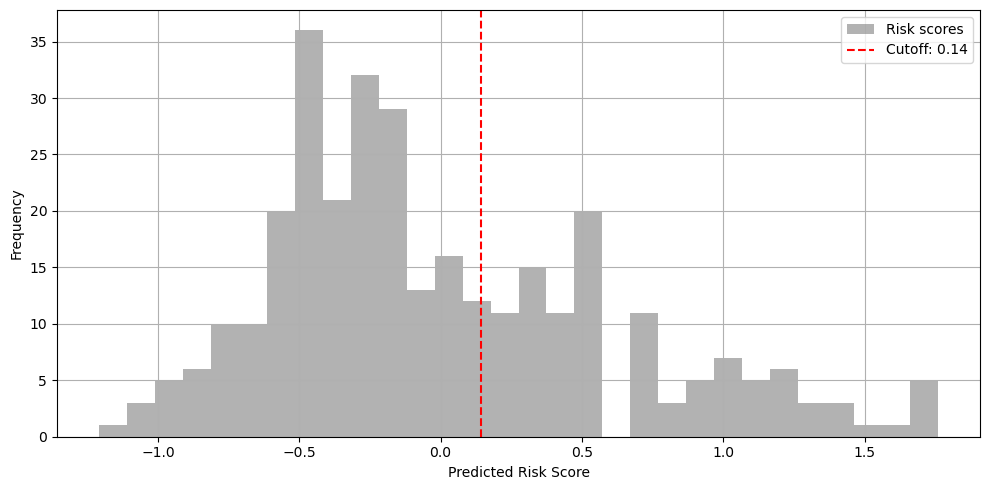

In [213]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted risk scores
risk_scores = final_model.predict(X_train)

# Reshape for GMM (expects 2D input)
risk_scores_reshaped = risk_scores.reshape(-1, 1)

# Fit a 2-component Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(risk_scores_reshaped)

# Predict cluster membership
clusters = gmm.predict(risk_scores_reshaped)

# Find the mean of each component (to locate cutoff between low/high risk)
means = gmm.means_.flatten()
means.sort()  # Ensure low to high order

# Find the cutoff as the midpoint between the two means
cutoff = np.mean(means)

print(f"Cluster means: {means}")
print(f"Suggested cutoff between risk groups: {cutoff:.4f}")

# Plot the distribution and cutoff
plt.figure(figsize=(10, 5))
plt.hist(risk_scores, bins=30, alpha=0.6, label="Risk scores", color="gray")
plt.axvline(cutoff, color='red', linestyle='--', label=f"Cutoff: {cutoff:.2f}")
plt.title("")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("Risk_GMM.jpeg", format="jpeg", dpi=300)
plt.show()


In [232]:
from lifelines import CoxPHFitter
import pandas as pd

# Step 1: Predict risk scores from RSF model (on X_train if you want to analyze training data)
risk_scores = final_model.predict(X_train)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_train to DataFrame for lifelines
# y_train is a structured array with fields 'event' and 'time'
y_df = pd.DataFrame({
    'PD': y_train['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_train['PFS']                 # time to event or censoring
})

# Step 3: Add risk group
y_df['clusters'] = (risk_scores > cutoff).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 321 total observations, 146 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 321
number of events observed = 175
   partial log-likelihood = -857.27
         time fit was run = 2025-08-16 21:45:07 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   1.42      4.14      0.16            1.11            1.73                3.04                5.64

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 9.03 <0.005     62.39
---
Concordance = 0.66
Partial AIC = 1716.54
log-likelihood ratio test = 79.47 on 1 df
-log2(p) of ll-ratio test = 60.82

In [233]:
summary_df = cph.summary

# Extract the data for plotting
hr = summary_df.loc['clusters', 'exp(coef)']
ci_lower = summary_df.loc['clusters', 'exp(coef) lower 95%']
ci_upper = summary_df.loc['clusters', 'exp(coef) upper 95%']
p_value = summary_df.loc['clusters', 'p']

print(p_value)

1.6581896428374535e-19


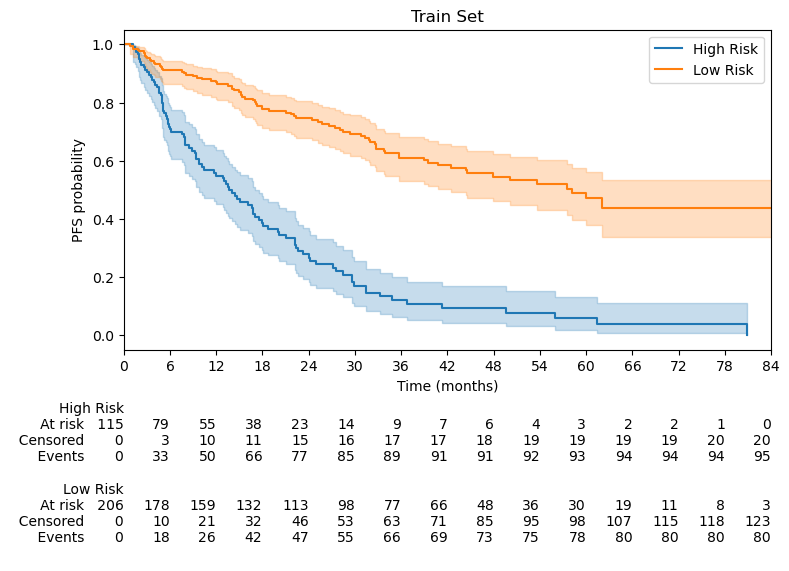

Log-rank p-value: 0.0000


In [234]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

# Masks for groups
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'],
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
km_high.plot_survival_function(ax=ax, ci_show=True)
km_low.plot_survival_function(ax=ax, ci_show=True)

# Axes/labels
ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("Train Set")

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Train.pdf", format="pdf", dpi=300)
plt.show()

# Log-rank test p-value
res = logrank_test(
    y_df.loc[mask_high, 'PFS'], y_df.loc[mask_low, 'PFS'],
    event_observed_A=y_df.loc[mask_high, 'PD'],
    event_observed_B=y_df.loc[mask_low, 'PD']
)
print(f"Log-rank p-value: {res.p_value:.4f}")


In [221]:
def bootstrap_median_ci(T, E, n_iterations=1000, ci=0.95):
    medians = []
    n = len(T)
    for _ in range(n_iterations):
        idx = np.random.choice(n, n, replace=True)
        kmf = KaplanMeierFitter()
        kmf.fit(T.iloc[idx], E.iloc[idx])
        medians.append(kmf.median_survival_time_)
    lower = np.percentile(medians, (1 - ci) / 2 * 100)
    upper = np.percentile(medians, (1 + ci) / 2 * 100)
    return lower, upper

for group in [0, 1]:
    mask = y_df['clusters'] == group
    T = y_df.loc[mask, 'PFS']
    E = y_df.loc[mask, 'PD']
    
    kmf.fit(T, event_observed=E, label=f'Group {group}')
    median_ = kmf.median_survival_time_
    
    lower, upper = bootstrap_median_ci(T, E)
    
    print(f'Group {group}: Median Survival = {median_}')
    print(f'95% CI Lower = {lower}, Upper = {upper}\n')



Group 0: Median Survival = 58.1
95% CI Lower = 40.8, Upper = nan

Group 1: Median Survival = 13.7
95% CI Lower = 9.8, Upper = 17.5



In [237]:
from tableone import TableOne
import numpy as np

# Merge predictors and outcomes, keeping clusters
cluster_df = pd.concat([X_train.reset_index(drop=True), y_df.reset_index(drop=True)], axis=1)

# Replace "None" with missing
cluster_df.replace("None", pd.NA, inplace=True)

# Define variables
columns = cluster_df.columns.drop("clusters").tolist()

categorical = [
    'Histotype', 'Menopausal', 'M_Brain', 'M_Liver',
    'M_Bone', 'M_Peritoneal', 'Bone_Only',
    'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'Sinc', 'HER2'
]

nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS']  # PD is binary, so better keep it categorical

# Build Table 1 stratified by risk clusters
my_table = TableOne(
    cluster_df,
    columns=columns,
    categorical=categorical + ['PD'],  # ensure PD is categorical
    groupby="clusters",
    pval=True,
    nonnormal=nonnormal,
    missing=True
)

# Print table
print(my_table)

# Save to Excel
my_table.to_excel("train_clusters.xlsx", index=True)


                                         Grouped by clusters                                                              
                                                     Missing           Overall                 0                 1 P-Value
n                                                                          321               206               115        
Age, median [Q1,Q3]                                        0  61.8 [52.7,70.6]  62.1 [54.5,71.4]  59.4 [50.0,69.7]   0.079
Menopausal, n (%)                   0.0                              74 (23.1)         42 (20.4)         32 (27.8)   0.193
                                    1.0                             245 (76.3)        162 (78.6)         83 (72.2)        
                                    None                               2 (0.6)           2 (1.0)           0 (0.0)        
Hormone_Resistance_Primary, n (%)   0                               295 (91.9)        199 (96.6)         96 (83.5)  <0.001
                

In [238]:
from lifelines import CoxPHFitter
import pandas as pd

# Step 1: Predict risk scores from RSF model (on X_train if you want to analyze training data)
risk_scores = final_model.predict(X_test)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_train to DataFrame for lifelines
# y_train is a structured array with fields 'event' and 'time'
y_df = pd.DataFrame({
    'PD': y_test['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_test['PFS']                 # time to event or censoring
})

# Step 3: Add risk group
y_df['clusters'] = (risk_scores > cutoff).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 138 total observations, 60 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 138
number of events observed = 78
   partial log-likelihood = -318.07
         time fit was run = 2025-08-16 21:49:24 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   0.95      2.58      0.23            0.50            1.39                1.65                4.03

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 4.15 <0.005     14.90
---
Concordance = 0.65
Partial AIC = 638.14
log-likelihood ratio test = 16.54 on 1 df
-log2(p) of ll-ratio test = 14.36

In [239]:
summary_df = cph.summary

# Extract the data for plotting
hr = summary_df.loc['clusters', 'exp(coef)']
ci_lower = summary_df.loc['clusters', 'exp(coef) lower 95%']
ci_upper = summary_df.loc['clusters', 'exp(coef) upper 95%']
p_value = summary_df.loc['clusters', 'p']

print(p_value)

3.265413922202486e-05


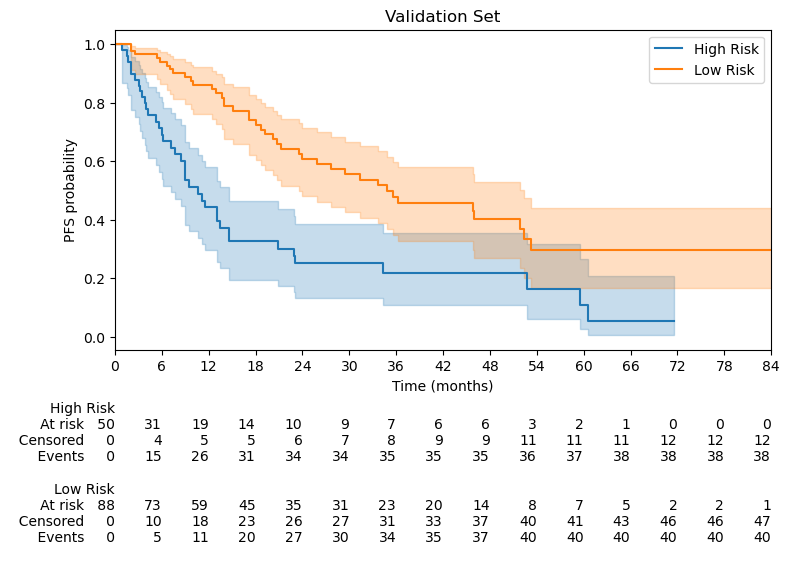

Log-rank p-value: 0.0000


In [240]:
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'],
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
km_high.plot_survival_function(ax=ax, ci_show=True)
km_low.plot_survival_function(ax=ax, ci_show=True)

# Axes/labels
ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("Validation Set")

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Val.pdf", format="pdf", dpi=300)
plt.show()

# Log-rank test p-value
res = logrank_test(
    y_df.loc[mask_high, 'PFS'], y_df.loc[mask_low, 'PFS'],
    event_observed_A=y_df.loc[mask_high, 'PD'],
    event_observed_B=y_df.loc[mask_low, 'PD']
)
print(f"Log-rank p-value: {res.p_value:.4f}")

In [241]:
# Merge predictors and outcomes, keeping clusters
cluster_df = pd.concat([X_train.reset_index(drop=True), y_df.reset_index(drop=True)], axis=1)

# Replace "None" with missing
cluster_df.replace("None", pd.NA, inplace=True)

# Define variables
columns = cluster_df.columns.drop("clusters").tolist()

categorical = [
    'Histotype', 'Menopausal', 'M_Brain', 'M_Liver',
    'M_Bone', 'M_Peritoneal', 'Bone_Only',
    'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'Sinc', 'HER2'
]

nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS']  # PD is binary, so better keep it categorical

# Build Table 1 stratified by risk clusters
my_table = TableOne(
    cluster_df,
    columns=columns,
    categorical=categorical + ['PD'],  # ensure PD is categorical
    groupby="clusters",
    pval=True,
    nonnormal=nonnormal,
    missing=True
)

# Print table
print(my_table)

# Save to Excel
my_table.to_excel("val_clusters.xlsx", index=True)

                                         Grouped by clusters                                                              
                                                     Missing           Overall               0.0               1.0 P-Value
n                                                                          321                88                50        
Age, median [Q1,Q3]                                        0  61.8 [52.7,70.6]  65.5 [55.6,73.8]  60.9 [51.5,68.8]   0.036
Menopausal, n (%)                   0.0                              74 (23.1)         18 (20.5)         11 (22.0)   1.000
                                    1.0                             245 (76.3)         70 (79.5)         39 (78.0)        
                                    None                               2 (0.6)           0 (0.0)           0 (0.0)        
Hormone_Resistance_Primary, n (%)   0                               295 (91.9)         82 (93.2)         45 (90.0)   0.527
                

In [231]:
def bootstrap_median_ci(T, E, n_iterations=1000, ci=0.95):
    medians = []
    n = len(T)
    for _ in range(n_iterations):
        idx = np.random.choice(n, n, replace=True)
        kmf = KaplanMeierFitter()
        kmf.fit(T.iloc[idx], E.iloc[idx])
        medians.append(kmf.median_survival_time_)
    lower = np.percentile(medians, (1 - ci) / 2 * 100)
    upper = np.percentile(medians, (1 + ci) / 2 * 100)
    return lower, upper

for group in [0, 1]:
    mask = y_df['clusters'] == group
    T = y_df.loc[mask, 'PFS']
    E = y_df.loc[mask, 'PD']
    
    kmf.fit(T, event_observed=E, label=f'Group {group}')
    median_ = kmf.median_survival_time_
    
    lower, upper = bootstrap_median_ci(T, E)
    
    print(f'Group {group}: Median Survival = {median_}')
    print(f'95% CI Lower = {lower}, Upper = {upper}\n')


Group 0: Median Survival = 34.8
95% CI Lower = 24.0, Upper = 52.4

Group 1: Median Survival = 10.6
95% CI Lower = 7.7, Upper = 14.6



## Early progression as binary

In [242]:
# Predict survival functions for test set
surv_fns_test = final_model.predict_survival_function(X_test)

# Evaluate survival probability at 6 months
target_time = 6.0
surv_at_6_months = np.array([fn(target_time) for fn in surv_fns_test])

# Predict as "high risk" if survival probability at 6 months is less than 50%
y_pred_binary = surv_at_6_months < 0.5

In [ ]:
# Identify patients with event before 6 months
observed_event_mask = (y_test["PD"] == True) & (y_test["PFS"] < 6.0)

# Identify patients censored before 6 months (to be excluded)
censored_before_6_mask = (y_test["PD"] == False) & (y_test["PFS"] < 6.0)

# Exclude censored patients before 6 months
valid_indices = ~censored_before_6_mask

# Filter predictions and ground truth
y_true_binary = observed_event_mask[valid_indices]
y_pred_binary = y_pred_binary[valid_indices]

# Count number of events (True in y_true_binary)
n_events = y_true_binary.sum()
n_total = y_true_binary.shape[0]

# Compute percentage
percent_events = (n_events / n_total) * 100

# Report
print(f'Number of Events: {n_events} out of {n_total} ({percent_events:.1f}%)')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_true_binary, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["No Early Event", "Early Event"]))


Confusion Matrix:
[[102   3]
 [ 16   3]]

Classification Report:
                precision    recall  f1-score   support

No Early Event       0.86      0.97      0.91       105
   Early Event       0.50      0.16      0.24        19

      accuracy                           0.85       124
     macro avg       0.68      0.56      0.58       124
  weighted avg       0.81      0.85      0.81       124



In [246]:
# We already computed this before
y_scores = -surv_at_6_months[valid_indices]  # Negative because lower survival = higher risk
y_true_binary = observed_event_mask[valid_indices]  # True/False labels

from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_true_binary, y_scores)
pr_auc = average_precision_score(y_true_binary, y_scores)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC: {pr_auc:.3f}")


ROC-AUC: 0.768
PR-AUC: 0.470


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, average_precision_score

# Your original scores and labels
y_scores = -surv_at_6_months[valid_indices]  # higher = higher risk
y_true_binary = observed_event_mask[valid_indices]  # True/False

# Point estimates
roc_auc = roc_auc_score(y_true_binary, y_scores)
pr_auc = average_precision_score(y_true_binary, y_scores)

# Bootstrap
n_bootstraps = 1000
rng = np.random.default_rng(42)
roc_values, pr_values = [], []

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_scores), size=len(y_scores), replace=True)
    if len(np.unique(y_true_binary[idx])) < 2:
        # skip if bootstrap sample has only one class
        continue
    roc_values.append(roc_auc_score(y_true_binary[idx], y_scores[idx]))
    pr_values.append(average_precision_score(y_true_binary[idx], y_scores[idx]))

roc_lower, roc_upper = np.percentile(roc_values, [2.5, 97.5])
pr_lower, pr_upper   = np.percentile(pr_values, [2.5, 97.5])

print(f"ROC-AUC: {roc_auc:.2f} (95% CI: {roc_lower:.2f} – {roc_upper:.2f})")
print(f"PR-AUC : {pr_auc:.2f} (95% CI: {pr_lower:.2f} – {pr_upper:.2f})")

from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_true_binary, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true_binary, y_scores)
plt.figure()
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

ROC-AUC: 0.77 (95% CI: 0.61 – 0.89)
PR-AUC : 0.47 (95% CI: 0.28 – 0.70)


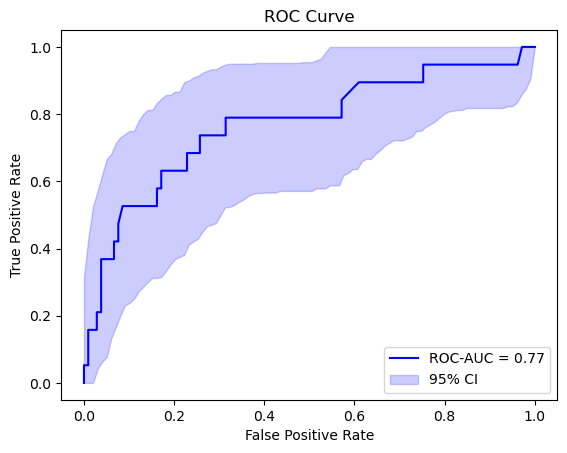

In [251]:
# Data
y_true = y_true_binary
y_score = y_scores

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Bootstrap for ROC CI
n_bootstraps = 1000
rng = np.random.default_rng(42)
tpr_bootstrap = []

fpr_grid = np.linspace(0, 1, 100)

for i in range(n_bootstraps):
    idx = rng.choice(len(y_true), size=len(y_true), replace=True)
    if len(np.unique(y_true[idx])) < 2:
        continue
    fpr_i, tpr_i, _ = roc_curve(y_true[idx], y_score[idx])
    tpr_interp = np.interp(fpr_grid, fpr_i, tpr_i)
    tpr_bootstrap.append(tpr_interp)

tpr_bootstrap = np.array(tpr_bootstrap)
tpr_lower = np.percentile(tpr_bootstrap, 2.5, axis=0)
tpr_upper = np.percentile(tpr_bootstrap, 97.5, axis=0)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}", color="blue")
plt.fill_between(fpr_grid, tpr_lower, tpr_upper, color="blue", alpha=0.2, label="95% CI")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.savefig("AUROC.pdf", format="pdf", dpi=300)
plt.show()

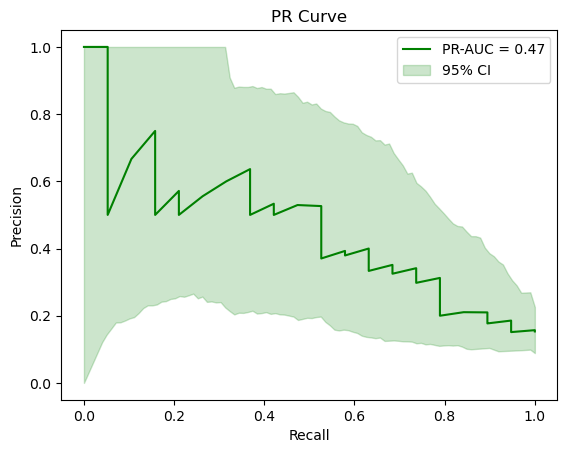

In [252]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_true, y_score)
pr_auc = average_precision_score(y_true, y_score)

# Bootstrap for PR CI
precision_bootstrap = []
recall_grid = np.linspace(0, 1, 100)

for i in range(n_bootstraps):
    idx = rng.choice(len(y_true), size=len(y_true), replace=True)
    if len(np.unique(y_true[idx])) < 2:
        continue
    prec_i, rec_i, _ = precision_recall_curve(y_true[idx], y_score[idx])
    prec_interp = np.interp(recall_grid, rec_i[::-1], prec_i[::-1])  # need monotonic recall
    precision_bootstrap.append(prec_interp)

precision_bootstrap = np.array(precision_bootstrap)
prec_lower = np.percentile(precision_bootstrap, 2.5, axis=0)
prec_upper = np.percentile(precision_bootstrap, 97.5, axis=0)

plt.figure()
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.2f}", color="green")
plt.fill_between(recall_grid, prec_lower, prec_upper, color="green", alpha=0.2, label="95% CI")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
plt.legend()

plt.savefig("PR.pdf", format="pdf", dpi=300)
plt.show()

## GBM (Deprecated)

In [51]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

est_cph_tree = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler(), 
                             GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0))
est_cph_tree.fit(X_train, y_train)

print(est_cph_tree.score(X_train, y_train))
print(est_cph_tree.score(X_test, y_test))

0.7734820579847909
0.7366341627437795
